<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Роман! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.





</div>

## Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
import random
import matplotlib.pyplot as plt
import  sklearn.metrics
#import seaborn as sns

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">

Совет:     
    
- Роман, у тебя тут есть лишние импорты, их стоит убрать, чтобы поберечь ресурсы      


- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html), в будущем пригодиться )  


In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
display(df.sample(5))
df.isna().sum()
df.duplicated().sum()
#df.shape
df.info()

,calls,minutes,messages,mb_used,is_ultra
1696,159.0,1174.00,149.0,33258.60,1
16,2.0,18.73,0.0,588.89,0
2000,69.0,479.88,27.0,20346.98,0
1011,92.0,654.76,31.0,14370.82,0
1742,62.0,410.27,19.0,14325.37,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Данные изучены.

👍   .sample() > .head()

    

<div class="alert alert-warning">



Совет: 

    
-   df.info() раскоментируй, важную информацию позволяет извлечь   
    
- Роман, можно еще отдельно проверить датасет на сбалансированность классов в таргете. Это важная информация при моделировании и помогло бы решить бонусное задание сразу.  Тут можно [почитать](https://dyakonov.org/2021/05/27/imbalance/) дополнительно зачем мы обращаем внимание на это





</div>


<div class="alert alert-info">
Раскоментировал, попробую понять про сбалансированность и задачи класификации.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех 👍:

👍
</div>




## Разбейте данные на выборки

#### Р азобъем данные на выборки указывая целевой признак переход на тариф SMART , ULTRA  для выявления зависимости которые помогут нам определить какие признаки перехода на смарт, а какие на ультра(модель).


In [3]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=12345)# разделил на тренировочную и тестовую части 
features = df_train.drop('is_ultra', axis =1)
target = df_train['is_ultra']
print('Размер тестовой выборки',df_test.shape,'размер тренировочной',df_train.shape)

Размер тестовой выборки (804, 5) размер тренировочной (2410, 5)


#### Разделим (тренировочные) данные на тренировочные и проверочные.

In [4]:
#df_test, df_train = train_test_split(df, test_size=0.25, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345, stratify = target )


In [5]:
features_train.shape[0] + features_valid.shape[0] == df_train.shape[0]


True

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

    
   
    
    
    
    
Ошибка:

    
По условию проекта создаем 3 датасета, на одном обучаемся, на другом валидируемся, на третьем проводим тестирование выбранной модели с лучшими гиперпараметрами

<div class="alert alert-warning">



Совет: 


- Обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым


- После разбиения лучше перестраховаться и использовать .shape, для контроля за корректностью разбиения    
    
</div>

<div class="alert alert-info">
Создал 3 датасета, я думал что функция train_test_split перемешивает данные по умолчанию и это понижает вероятность ............. Про балансирование не знал.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех 👍:

Исправлено
</div>


## Исследуйте модели

#### Проверим какие модели для убучения нам подходят лучше всего по признаку accuracy(Отношение числа правильных ответов к размеру тестовой ) .Для этого используем  библиотеки для создания трех моделей и сравним признак. У какой модели больше ту и исползуем для использования. 

In [6]:
#model_1 = DecisionTreeClassifier(random_state=12345,max_depth=3)

#model_2 = RandomForestClassifier(random_state=12345,n_estimators=20)

##model_3 = RandomForestRegressor (random_state=12345,max_depth=3, n_estimators=5)




#### Протестируем модель по максимальной глубине дерева от 1 до 50

Accuracy наилучшей модели на валидационной выборке: 0.79 max_depth = 7


<function matplotlib.pyplot.show(close=None, block=None)>

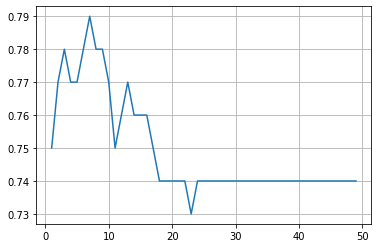

In [7]:
x =[]
y= []
best_model = None
best_result = 0
max_depth = 0
for dept in range(1,50):
    model_1 = DecisionTreeClassifier(random_state=12345,max_depth=dept)
    model_1.fit(features_train,target_train) # обучите модель на тренировочной выборке
    predictions_valid = model_1.predict(features_valid)          
    result = accuracy_score(target_valid,predictions_valid).round(2)
    x.append(dept)
    y.append(result)
    if result > best_result:
        best_model_dc = model_1# сохраните наилучшую модель
        best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных
        max_depth = dept
print("Accuracy наилучшей модели на валидационной выборке:", best_result,'max_depth =',max_depth)
#    print('max_depth =',dept,':', accuracy)
plt.grid()
plt.plot(x, y)
plt.show

#print(y)


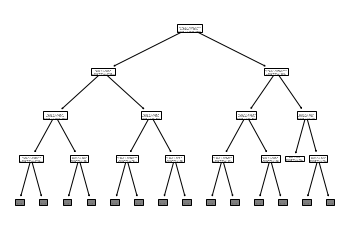

In [8]:
tree.plot_tree(model_1,max_depth = 3);

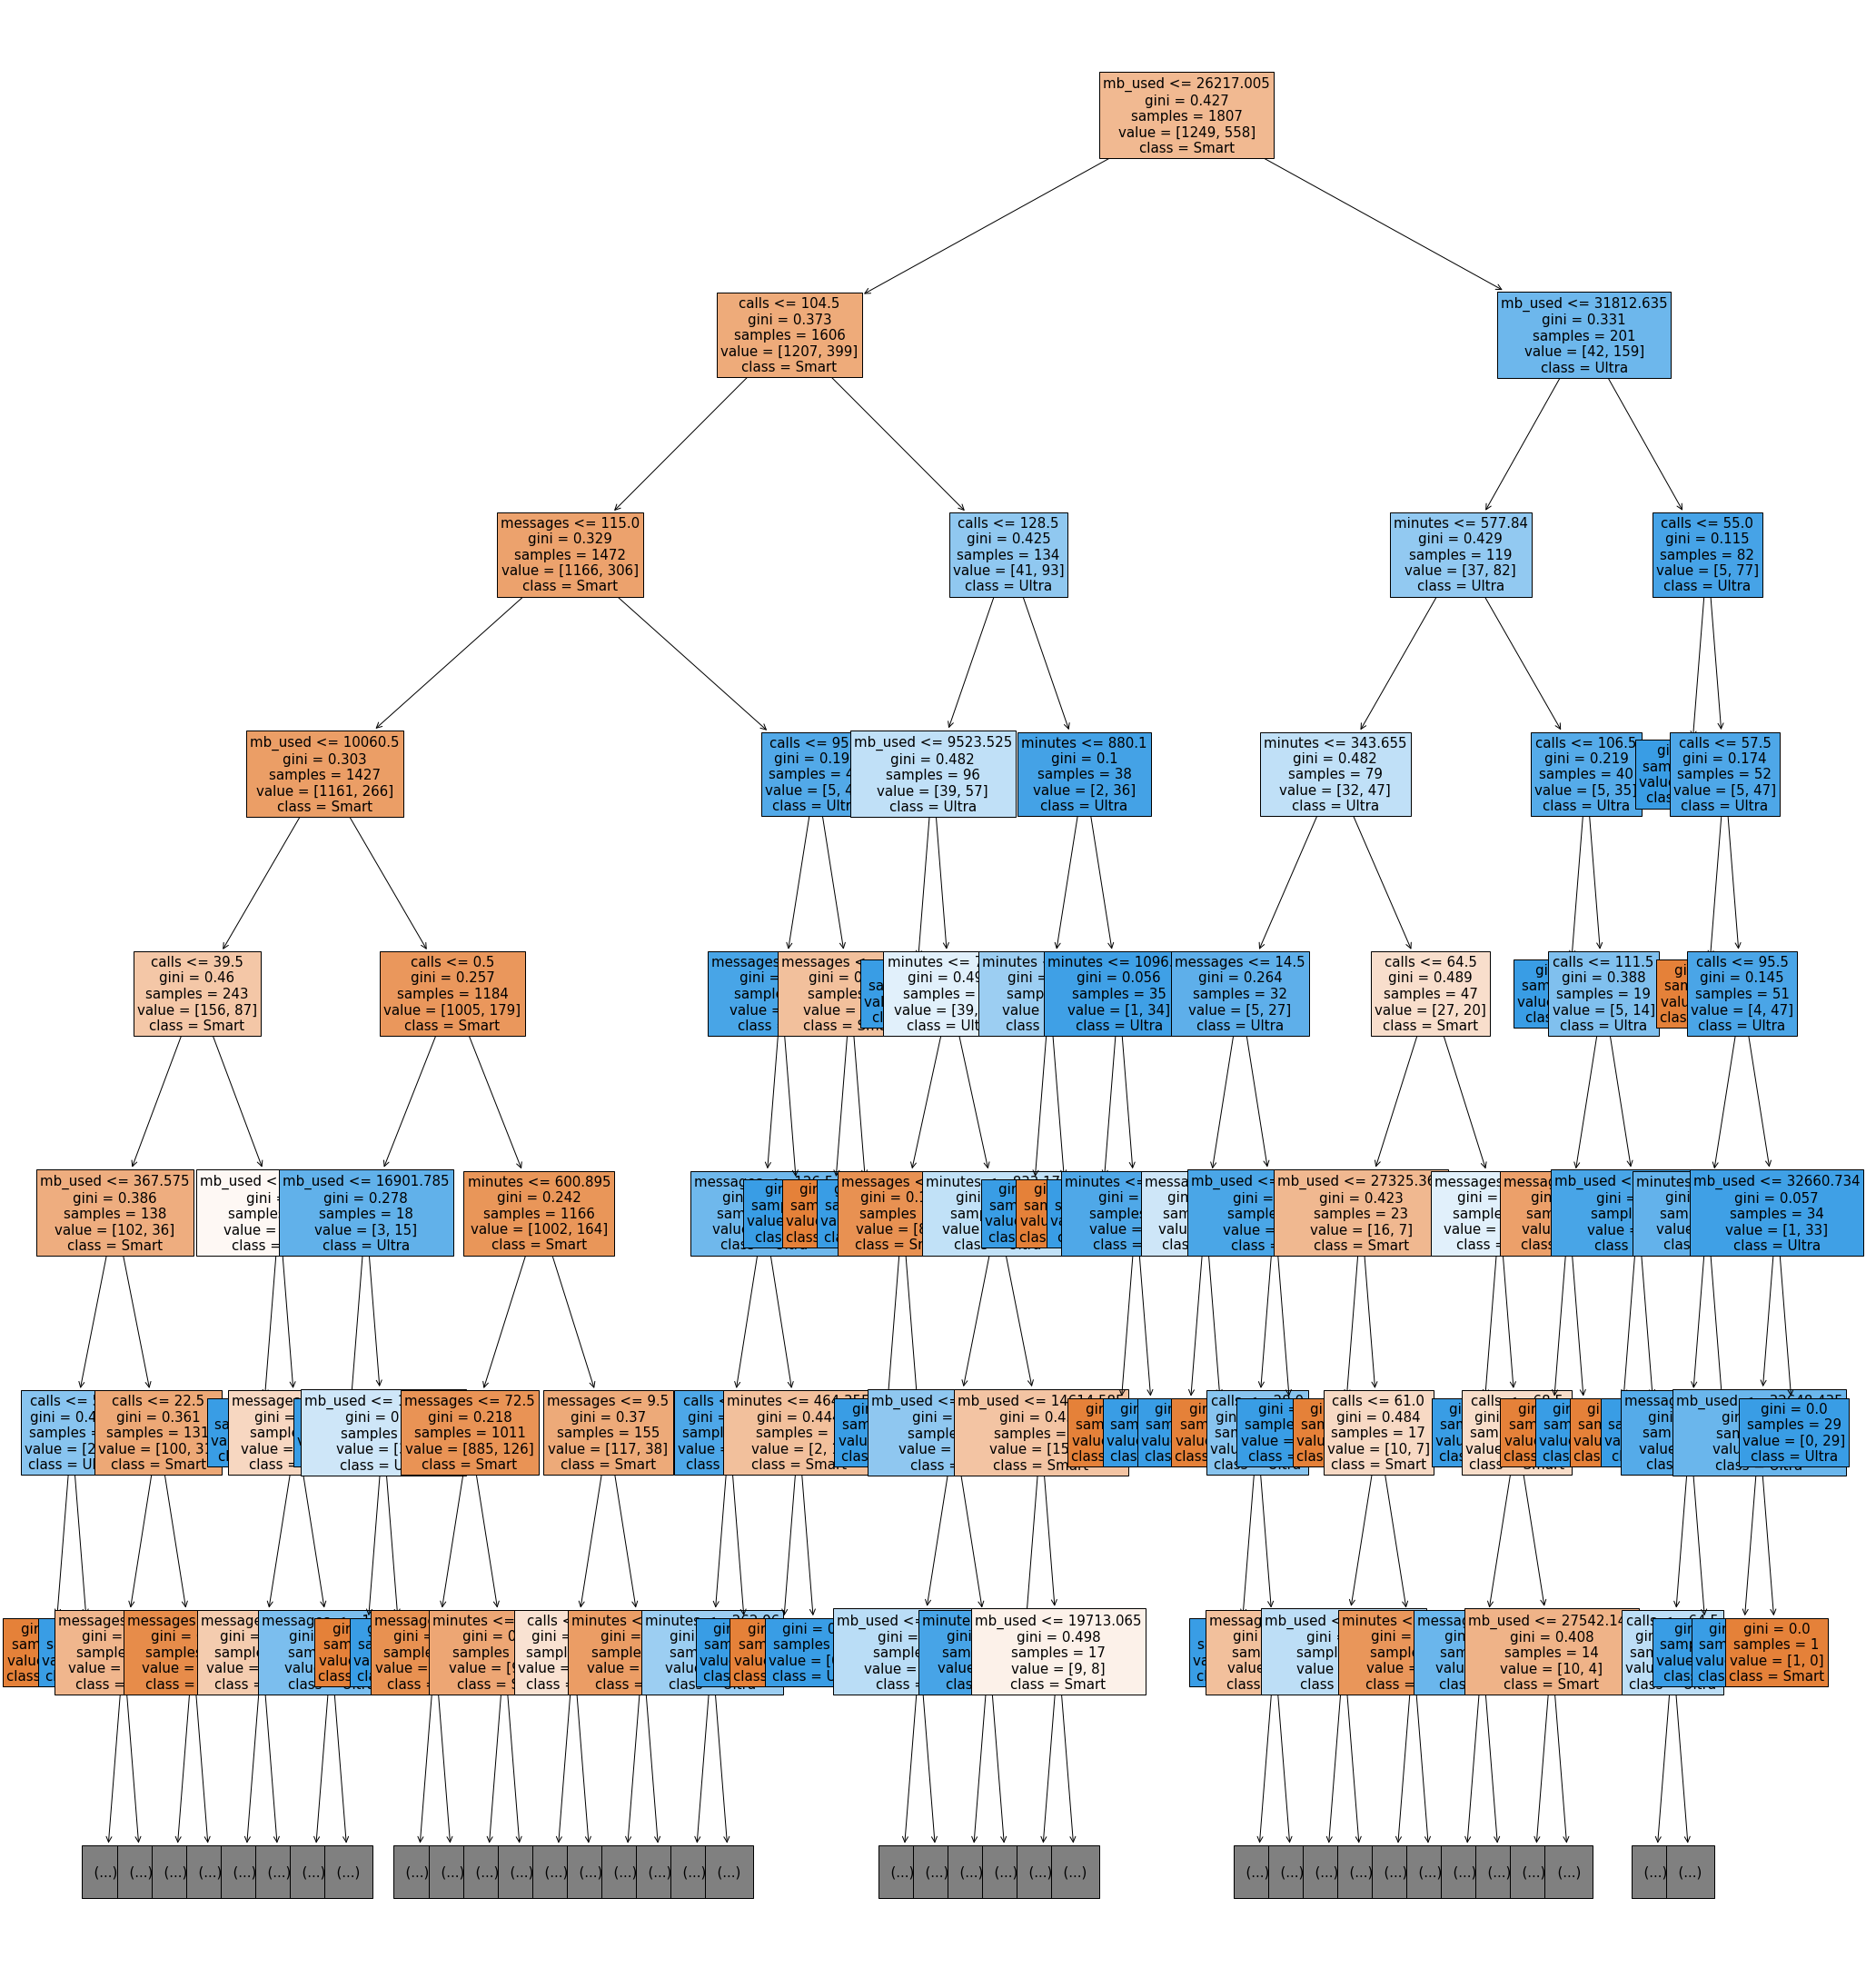

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(35,40));
tree.plot_tree(model_1, 
               feature_names=features.columns.values, 
              class_names=['Smart','Ultra'],
               filled=True,
               fontsize = 15,max_depth = 7);




<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Совет:


Чтобы не было каракуль ставим в конце `;`
    
Так красивей (схема)
    
    
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(35,20))
    _ = tree.plot_tree(your_model, 
                   feature_names=features.columns.values, 
                   class_names=['Smart','Ultra'],
                   filled=True,
                   fontsize = 15)
    
    

  


</div>



  

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
Работа выполнена в соответствии с критериями: 



 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле



+ за график


<div class="alert alert-warning">


Совет: 




- График это здорово, но обычно смотрят на метрики качества и по валидации и по train, и на основании увиденного и делают вывод о моменте переобучения. 



- tree_plot можно построить, с max_depth равной 3 или 4 (глубже уже будет громоздко) - глянуть как DT сплиты делает, будет понимание как модель принимает решения: какие признаки  использует, на каких значениях делает разбиение вправо - влево 



</div>




Модель имеет  колебания от количества решений в пределах от 0 до 20, оптимальное значение равно 49. Если применить точность до 5 го знака то вполне достаточно значения глубины равное 2. Понимание пока не пришло,но я стараюсь...

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

- max_depth это глубина деревьев

    
    
- Тут стоит подправить:
    
    
    "Accuracy наилучшей модели на валидационной выборке: 0.79 max_depth = 49"   

ведь лучшая метрк адостигается не при глубине 49    
</div>


<div class="alert alert-info">
невнимательность, dept последний номер в цикле. (Штирлица выдавал волочащейся за ним парашют%))

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех 👍:

Теперь ничего не выдавало Штирлица
</div>


#### Протестируем модель по лесу. В качестве вариации используем параметры количества глубины  деревьев.

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Accuracy наилучшей модели на валидационной выборке: 0.81 n_estimators = 15 max_depth = 9


<function matplotlib.pyplot.show(close=None, block=None)>

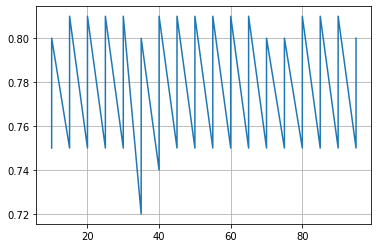

In [28]:
%time
x = []
y = []

best_model = None
best_result = 0
estimators = 0
max_depth = 0
for n_estimators in range(10,100,5):
    for dept in range(1,10):
        model_2 = RandomForestClassifier(random_state=12345,n_estimators=n_estimators,max_depth = dept)
        model_2.fit(features_train,target_train) # обучите модель на тренировочной выборке
        predictions_valid_2 = model_2.predict(features_valid)          
        result = accuracy_score(target_valid,predictions_valid_2).round(2)
        x.append(n_estimators)
        y.append(result)
       
        if result > best_result:
            best_model_rf = model_2# сохраните наилучшую модель
            best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных
            max_depth = dept
            estimators =n_estimators
print("Accuracy наилучшей модели на валидационной выборке:", best_result,'n_estimators =',estimators,'max_depth =',max_depth)
#    print('n_estimators =',n_estimators,':', accuracy_2)
plt.grid()
plt.plot(x, y)
plt.show


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:

Тут бы подошел трехмерных график или .heatmap()

</div>


 <div class="alert alert-info">

##### Модель имеет лучшее значение при параметрах n_estimators = 15 max_depth = 9. Наблюдаем колебания результата от 0.76 до 0.81, если гнаться за экономией вычислительных мощностой то можно ограничиться значением n_estimators =  35.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

    
Не сооветветствует действительности
    
    
    Модель имеет лучшее значение при параметрах n_estimators = 95 max_depth = 9
    
</div>

 <div class="alert alert-info">
 Исправил. синтаксис и невнимательность самая большая беда.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех 👍:

👍
</div>







<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
    
По большему числу гиперпараметров перебор -   тем лучше метрика. Здорово   




<div class="alert alert-warning">


Совет: 

- Здорово что использован перебор не по одному гиперпараметру. Поэтому посоветую поизучать sklearn-ий GreedSearchCV. В случаи использования GridSearch, не нужно будет заранее делать валидационную выборку, лучшую метрику автоматом сохранят в best_score_, а лучшую модель (переобученная уже на полном наборе данных) будет хранить в best_estimator_. Это тема будущих теоретических занятий, но если есть время можешь сразу попробовать.


</div>


#### Протестируем модель по количеству итераций

In [ ]:
%time
x =[]
y= []
best_model = None
best_result = 0
for max_iter in range(100,1300,50):
    model_3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=max_iter)
    model_3.fit(features_train,target_train) # обучите модель на тренировочной выборке
    predictions_valid_3 = model_3.predict(features_valid)          
    result = accuracy_score(target_valid,predictions_valid_3).round(4)
    x.append(max_iter)
    y.append(result)
    if result > best_result:
        best_model_lr = model_3# сохраните наилучшую модель
        best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных
print("Accuracy наилучшей модели на валидационной выборке:", best_result,'max_iter = ',  max_iter    )        
#rint(accuracy_3)
plt.grid()
plt.plot(x, y)
plt.show

Модель стабильна но не является лучшей по количеству ошибок.

####  Вывод:  Наилучшей удовлетворяющей критерию точности  являвляется модель  Случайный лес. с параметрами   n_estimators = 15 max_depth = 9.


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


RF лучший, но не с такими гиперпараметрами. 


<div class="alert alert-warning">


Совет: 

Если есть желание можешь ответить на вопросики ))    



- Как назвать ситуацию, когда на валидации при увеличении глубины дерева (модель DT), метрика качества стала снижаться? Как по твоему в это же время вела себя эта же метрика на train?


- Насколько знаю вы еще под капот моделям не заглядывали, но может знаешь почему RF показывает более высокие результаты из выбранных?


- Мы решаем задачу классификации (а еще есть задача регрессии), а в названии модели с помощью которой мы решаем задачу "классификации" есть слово "регрессия".  Нет ли тут парадокса? )
    

- Почему логистическая регрессия показывать на много более худшие результаты?  


</div>





*при проверке (валидации) используется набор данных сколичеством меньше  чем на тренировочной(следовательно вариативность парметров данных заведомо  меньше), глубина дерева подразумевает разбитие задач сравнения для ветевления дерева на ответы да или нет, следовательно вариативности горахдо меньше и если принудильно ставить глубину больше то модель будет искать не имеющие значения признаки и  в конце концов будет ошибаться чаще при увеличении ветвлений.(это схоже с переобучением модели) 

* догадываюсь только. Догадки такие: а) лес имеет много схожих моделей деревьев, каждое дерво имеет свой оптимальный набор. и выбрать оптимальное из оптимальных лучшая стратегия. например. Мы имеем одно дерево со схожими параметрами но разной глубины и там где глубина больше произошло переобучение, а соседнее дерево имеет меньшую глубину но с лучшими параметрами. поэтому из этих двух мы выберем лучшее по внешним признакам.   

* парадокса нет из определения регресии и класификации. Классификация — получаем ответ «вероятно, да/вероятно, нет.Регрессия — получаем ответ в виде чисел и графиков функций. но та и другая задача имеет целевые значения сранивая который мы получаем прогноз(класификация, да или нет из целеывого значения) или ответ в виде число(не содержащейся в целевых  данных но явлющие собой  тоже прогноз основаный на тендеции)

* вот тут я не разобрался(( т.е могу напридумывать конечно но понимания не произошло. Вроде как задача класификация и должно сортироваться,отфильтровываться практически однозначно но...???


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>


Успех:


Дополню чуть

1. Переобучение. На train точность растет вплоть до 100%. 
    
    
2. Да, в RF обучается несколько деревьев, а решение принимается путем голосования. Каждое дерево в RF учится на своем датасете (используется техника бутстрап), таким образом достигается "независимость" этих самых деревьев, в итоге ошибка разброса снижается.

    
3. "Регрессия", потому что внутри нее скалярное произведение (как и в линейной регрессии), дающее на выходе вещественное число (от + бесконечности до - бесконечности), на это число вешают сигмойду, логарифм и получают значение от 0 до 1 (вероятность класса).   
    
    
4. Логистическая регрессия плоха (и хороша с другой стороны) тем что это линейный классификатор: обьекты на классы разделяем гиперплоскостью (прямой если на плоскости), а в данном датасете видимо более сложные, нелинейные связи между признаками и таргетом.   А RF с DT с этим справляются. На других данных  LR могла оказаться лучше, например потому что RF не может экстраполировать. 


</div>

<div class="alert alert-info">
    Исправил параметрвы RF______________ Было 95 стало 15

## Проверьте модель на тестовой выборке

#### Загрузим лучшую модель по версии предидущих иследований

In [ ]:
features_test = df_test.drop('is_ultra', axis =1)
target_test = df_test['is_ultra']

#model_2 = RandomForestClassifier(random_state=12345,n_estimators=15,max_depth = 9)
best_model_rf.fit(features_train,target_train) # обучите модель на тренировочной выборке
predictions_test = best_model_rf.predict(features_test) # получите предсказания модели на валидационной выборке
result = accuracy_score(target_test,predictions_test).round(4)

#result = mean_squared_error(target_valid,predictions_valid) **0.5# значение метрики RMSE на валидационной выборке
#print("RMSE наилучшей модели на валидационной выборке:", result)
print("Accuracy наилучшей модели на тестовой выборке:", result)



In [ ]:
print(best_model_rf)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Ошибка ❌:

    
    
посмотри 
    
    
    print(best_model_rf)
    
    
ой а там не RF!
    
Как так!? А потмоу что:
    
    
         if result > best_result:
            best_model_rf = model_1# сохраните наилучшую модель   
    
    
    
а что за модель такая   model_1?
    
    
    
Стоит привести это в порядок и метрика будет что надо    
</div>

<div class="alert alert-info">
    <font size="5"><b>Комментарий студента V3</b></font>
 исправил и все пришдо в норму

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Успех 👍:

👍
</div>


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

- RandomForestClassifier(random_state=12345,n_estimators=75,max_depth = 9) - не лучшая модель
    

- Тут мы используем test датасет. Тестовая (out-of_sample) у нас для финальной проверки, когда определена модель с конкретными гиперпараметрами. Это тот датасет который модель никак не видела (на train мы обучаемся, на valid подбираем гиперпараметры - модель так или иначе их "видит"), это уже имитация реального прогноза
    
    
- Стоит разобраться в метриках качества для задач регрессии и классификации, и заменить RMSE чем то более подходящим.

    
    
</div>

<div class="alert alert-info">
* Подставил параметры лучшей модели
* Использовал тестовую выборку(train заменил на test) в обучении модели
*

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Ошибка ❌:

    
- Роман убери ты уже этот mse ) Это метрика для задач регрессии, а у на классификация, используем все ту же accuracy_score 
    
    
    
-  RandomForestClassifier(random_state=12345,n_estimators=15,max_depth = 9) - модел с лучшими шгиперпараметрами, но обученная на train, а ты обучаешь на test, в чем смысл? На test мы теструем, это уже как имитация реального прогноза, когда мы правильный ответ ка бы не знаем. Советую когда ты пребирал для RF сделать так:
    
    
            if result > best_result:
                best_model_rf = model_1   (best_model_rf а не best_model, - потому что затем ты под тем же именем ты соххраняешь лучшую модель LR)
    
    
и просто с помощью best_model_rf делаешь прогноз на test и сомтришь достигу > 0.75 по accuracy      
     
    
</div>

<div class="alert alert-info">
    <font size="5"><b>Комментарий студента V2</b></font>
 исправил получилось что на реальных данных  RF совсем не лучший(( не дости он 0.75.  Вывод переделал.
   В переборах использовал рекомендованный способ.и в 5 разделе тоже произошли изменения



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


- В остальном верно, Роман, логика моделирования не нарушена, тут тестируем только лучшую модель (или парочку, если метрики были близки) отобранную на валидации. 



<div class="alert alert-warning">

Вопросики и совет:




- Как попробовать улучшить результат, не мучаясь с кодом?! Смотри - мы сформировали train выборку на которой обучаем модель, а валидационную используем для поиска лучших значений гиперпараметров. Оке, нашли их. Так почему бы теперь модель с выбранными гиперпараметрами не обучить на тренировочной + валидационной выборке (только не нужно делать новые сплиты, используй pd.concat(), к примеру)?! Чем больше данных, тем лучше модель может обучиться. И эту дообученную модель проверим на тесте. Гаранитий что станет лучше нет, но ML это постоянные эксперименты.  
    




</div>



#### Вывод: Accuracy наилучшей модели на тестовой выборке:0.8047
*

## (бонус) Проверьте модель на адекватность

 #### Обучим модель на всех данных и  проверим модель на выборке из начальных данных по случайному количеству строк из размере тестовых данных, см п.2.01,  100 раз. Применим этот подход ко всем моделям.

In [ ]:
data = df_test[10:15]
print(data)

 ####  Модель DecisionTreeClassifier

In [ ]:
acc_list = []
for i in range(100):
    n = random.randint(100,800)
    data = df_test[(n - 99):n]
    data1 = data.drop('is_ultra', axis =1)
    predict_1 = best_model_dc.predict(data1)
    acc = sklearn.metrics.accuracy_score(data['is_ultra'],predict_1)#это показатель, который описывает общую точность предсказания модели 
    acc_list.append(acc)
print('Среднее',(sum(acc_list)/len(acc_list)).round(3),'Минимум',min(acc_list).round(3),'Максимум', max(acc_list).round(3))


  #### Модель RandomForestRegressor

In [ ]:
#model_2 = RandomForestClassifier(random_state=12345,n_estimators=75,max_depth = 9)
#model_2.fit(features,target)
#predict = model_2.predict(features)
acc_list = []
for i in range(100):
    n = random.randint(100,800)
    data = df_test[(n - 99):n]
    data1 = data.drop('is_ultra', axis =1)
    predict_1 = best_model_rf.predict(data1)
    acc = sklearn.metrics.accuracy_score(data['is_ultra'],predict_1)
    acc_list.append(acc)
print('Среднее',(sum(acc_list)/len(acc_list)).round(3),'Минимум',min(acc_list).round(3),'Максимум', max(acc_list).round(3))


####  Модель LogisticRegression

In [ ]:
acc_list = []
for i in range(10):
    n = random.randint(100,800)
    data = df.loc[(n - 99):n]
    data1 = data.drop('is_ultra', axis =1)
    predict_1 = best_model_lr.predict(data1)
    acc = sklearn.metrics.accuracy_score(data['is_ultra'],predict_1)
    acc_list.append(acc)
print('Среднее',(sum(acc_list)/len(acc_list)).round(3),'Минимум',min(acc_list).round(3),'Максимум', max(acc_list).round(3))

Расчет матрицы ошибок с помощью Scikit-Learn для нашей модели

In [ ]:
r = sklearn.metrics.confusion_matrix(data['is_ultra'],predict_1)
print(r)

Вывод: Победила модель RF 


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


Роман, тобой решено проверить модель на адекватность "подгрузив" несколько других метрик качества. Да, в этом резон есть, например нам важно было качество предсказания какого-то одного класса, тогда да, мы бы проверяли на метриках, которые учитывают это и получили бы более адекватные оценки.   

В данном случаи мы проверяем модель на адекватность сравнивая ее с наивным прогнозом (простой "угадалкой" или прогноз одного и того же класса). Не забудь у нас дисбаланс классов в таргете. 


<div class="alert alert-warning">


Совет: 

При проверке на адекватность модели, рекомендую ознакомиться с [Dummy Models](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), это удобная обертка для константных моделей

</div>





<div class="alert alert-info">
С советом не справился, буду читать еще, но работу сдавать надо поэтому я использовал подход" наивного анализа" описал его выше. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Тут логика такая - у нас есть данные и мы видим что доля нулей в таргете около 69%, это значит что мы не проводя никакого анализа, моделирования итп итд, можем постоянно предсказывать 0 и получить точность около 69%. Вот эту accuracy в 69% мы и должны побить, иначе окажется что наша модель не лучше наивного прогноза самого частого класса.
      
    
С   DummyClassifier это выглядело бы  так:
    
    DummyClassifier(strategy='most_frequent', random_state=1)  
задаем константную модель, которая будет предсказывать по most_frequent - самый частый класс
    
    .fit(features_train, target_train)
тут модель смотри на самый частый класс в  target_train - типо "обучение"
    
    .predict(features_valid)
    .score(features_test, target_test)
проогнозирует везде самый частый класс в features_test и считает score
    
Получаем тот же результат: acc около 69%.    

<div>


In [ ]:
from sklearn.datasets import load_boston
x,y = load_boston(return_X_y=True)



<div class="alert alert-info">
    <font size="5"><b>Комментарий студента V2</b></font>
    Переделал финальную 5 ю часть , так как не учел в п.3 что модели не сохраняют оптимальные значения.Тем не менее отправляю на проверку жду замечаний, завтра у меня будет день чтений)).Может стоит прогнать через п.4 все модели? Спасибо за работу, скорость реакции  и проявленное терпение.
     

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Совет 🤔:


Все же советую обратить внимание на мой коментарии, то что я написал и есть проверка модели на адекватность.
</div>


<div class="alert alert-info">
    <font size="5"><b>Комментарий студента V3</b></font>
   
Я поправил все замечания(возможно есть еще и я не вижу конечно). Чтоб не казалось что я игнорирую замечания я распишу свое понимание задачи и реализую рекомендованный метод(в курсе  нам этого не рассказывали конечно и видимо это такой подход упирающий на максимальное самообучение).
 
     У нас есть набор данных о тарифах, где укзаны исторические данные которые использовали владельцы определившиеся с тарифами.Стоит задачи выработать такую стратегию(модель) которая предложит людям из "других" тарифов на основании их исторических данных предложить использовавать эти тарифы.Это все относится к задаче классификации
    В исторических данных тарифов Smart("0") и Ultra("1") количество данных о тарифе Smart больше отсюда появляется понимание несбалансированности данных поэтому в первом замечании ты предложил мне проверить их на сбалансированость а потом работать с ними.  Данные нужно нормировать(избавиться от дисбаланса) Может я ошибаюсь(скорее всего) но при разделении используется такое микширование данных которое предполагает избавление от нормировки (по крайней мере в курсе ни слова не было про дисбаланс.)
    Дальше я разбил данные на три группы.Взял предложенные модели и перебирая их  гиперпараметры выбрал лучшую используя в качестве критерия отбора параметр качества предсказания.
        Далее проверил выбранную модель на тестовых данных (тут конечно вылези ошибки связанные с моей невнимательностью и недостатком знания билиотек, параметров моделей и  т.д. и т.п.). 
    Бонусное задание о проверке адекватности я понял по своему и реализовал придуманный мной" наивные метод" (опять же в курсе не слова об этом, там использовался MSE для регрессии). после твоих замечаний я ознакомился о сбалансированности данных и узнал о существовании "DummyClassifier-это классификатор,который делает прогнозы,используя простые правила" и привел его ниже отдельным блоком.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Совет 🤔:

Все нормально но не надо спешить сдавать работу, лучше перепроверить - быстрей будет в итоге

</div>


In [ ]:
from sklearn.dummy import DummyClassifier
model_sk = DummyClassifier(strategy='most_frequent', random_state=1)
# most_frequent всегда предсказывает наиболее частую метку в обучающем наборе.\
#В нашем случае это 0.
model_sk.fit(features_train, target_train)# обучение данных на тренировочной выборке
predict = model_sk.predict(features_valid) # предсказание наиболее встречающей метки это 0

sc =  df.groupby(df['is_ultra']== 0 )['is_ultra'].count()# групировка по целевому признаку
print(sc) 
print('Количество нулей в данных  ',sc[1]/(sc[0] + sc[1] ))

#print(predict)
print( 'Предсказание "наивного" прогноза' , model_sk.score(features_test, target_test))


Теперь осталось разобраться что же  это все значит и адекватная ли у нас модель!!!!
получается что модель RF имеет точность предсказания 80% а вот если бы просто ткнули пальцем в данные мы бы получили "0" в 70 %  и "1" в 30 %(если   цель были данные с "0"  то вполне себе прилично, а если  "1"  то просто отвратительно). Но на ша модель имеет 80% и для "0" и для "1" так что будем считать ее адекватной.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Успех 👍:

👍
</div>


## Чек-лист готовности проекта


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>




Роман, у тебя старательно выполненная работа, все четко, осмысленно. Выводы присутствуют.С комментированием кода тоже никаких проблем нет, твоих объяснений достаточно для понимания коллегами хода твоих мыслей. 

Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить): 

- обрати внимание на проверку сбалансированность классов в таргете в разделе EDA
- использовать stratify   
- посоветовал посмотреть в сторону GridSearchCV
- как можно улучшить результаты 

Замечания на будущее:
    
выводе немножко о данных, работе с ними (пусть даже никакой работы и не было), моделировании и полученных результатах. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе.

 
    
Обязательное к исправлению:
    
    
    

- отсутствует test датасета на котором мы проделываем финальную проверку и нет прверки модели на нем
    


    
- не верно выводишь параметры лучших моделей на валидации    
    
    
    
- стоит разобраться в метриках качества для задач регрессии и классификации
    
    
    
    
    
- стоит переделать бонусное задание с учётом моего комментария

 




Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 

</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>



    
Красное исправлено, многие желтые советы использованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и ты узналА что то новое, а проект стал лучше, и симпатичней.


- Осталось убрать mse и использовать старый добрый accuracy_score 
    
    
- При проверка на test использовать модель обученную на train
    
    
    
и работу можно принимать. На связи

</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>



    
На тесте используешь не лучшую модель. На связи



</div>

<div class="alert alert-info">
    <font size="5"><b>Комментарий студента V3</b></font>
   Все верно,  нужно балансировать надо,  DummyClassifier  разобрался буду дальше использовать.Черпал отсюда(https://runebook.dev/ru/docs/scikit_learn/modules/model_evaluation#dummy-estimators)  


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Красного нет, вопросов нет, значит все, пора принимать)

  
Отличная работа Роман. Желаю успехов в дальнейшей учебе!




</div>

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
